<a href="https://colab.research.google.com/github/yxunakim84/class2022Spring/blob/main/20220328.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **한국환경공단_RFID기반 음식물쓰레기 배출정보**
10) 지자체별 배출내역(일별) 목록 조회 오퍼레이션 명세

https://www.data.go.kr/iim/api/selectAPIAcountView.do

In [ ]:
!pip install gradio
import requests

In [ ]:
URL = ('http://apis.data.go.kr/B552584/RfidFoodWasteServiceNew/getCityTimeList?ServiceKey=PDrC30yqz5xm03cPHnuI%2FWiWBVd5nrt%2BZ8LwZ%2BNqnOLOAYBRqRdtbn0AVLQqAukONS9DlHMI7gKb7tMQnekcmA%3D%3D&type=json&page=1&rowNum=1&disYear=2020&disMonth=01&cityCode=W34')
response = requests.get(URL)

In [ ]:
r = response.json()
r

In [ ]:
import gradio as gr
import pandas as pd

In [ ]:
def test(cityCode, year):
  URL = ('http://apis.data.go.kr/B552584/RfidFoodWasteServiceNew/'
      'getCityTimeList?'
      'ServiceKey=PDrC30yqz5xm03cPHnuI%2FWiWBVd5nrt%2BZ8LwZ%2BNqnOLOAYBRqRdtbn0AVLQqAukONS9DlHMI7gKb7tMQnekcmA%3D%3D'
      '&type=json'
      '&page=1'
      '&rowNum=1'
      '&disYear='+year+
      '&disMonth=01'
      '&cityCode='+cityCode)
    
  response = requests.get(URL)
  r = response.json()
  items = r['data']['list']

  cityCode = [item['cityCode'] for item in items]
  citySggName = [item['citySggName'] for item in items]
  citySidoName = [item['citySidoName'] for item in items]
  disCount = [item['disCount'] for item in items]
  disCountRate = [item['disCountRate'] for item in items]
  disHour = [item['disHour'] for item in items]
  disMonth = [item['disMonth'] for item in items]
  disQuantity = [item['disQuantity'] for item in items]
  disQuantityRate = [item['disQuantityRate'] for item in items]
  disYear = [item['disYear'] for item in items]

  cityCode = pd.Series(cityCode)
  citySggName = pd. Series(citySggName)
  citySidoName = pd.Series(citySidoName)
  disCount = pd.Series(disCount)
  disCountRate = pd.Series(disCountRate)
  disHour = pd. Series(disHour)
  disQuantity = pd.Series(disQuantity)
  disQuantityRate = pd.Series(disQuantityRate)
  disYear = pd.Series(disYear)

  df = pd.DataFrame({'cityCode':cityCode, 'citySggName':citySggName, 'citySidoName':citySidoName, 'disCount':disCount, 'disCountRate':disCountRate, 'disHour':disHour, 'disQuantity':disQuantity, 'disQuantityRate':disQuantityRate,'disYear':disYear})
  return df

In [61]:
from gradio.inputs import Dropdown
iface = gr.Interface(test, [gr.inputs.Dropdown(['W0'+ str(number) for number in range(1, 10)]+['W'+ str(number) for number in range(10, 38)]), gr.inputs.Dropdown([str(year) for year in range(2018, 2022)])], outputs=['dataframe'])
iface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://10664.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f31b6417990>,
 'http://127.0.0.1:7861/',
 'https://10664.gradio.app')

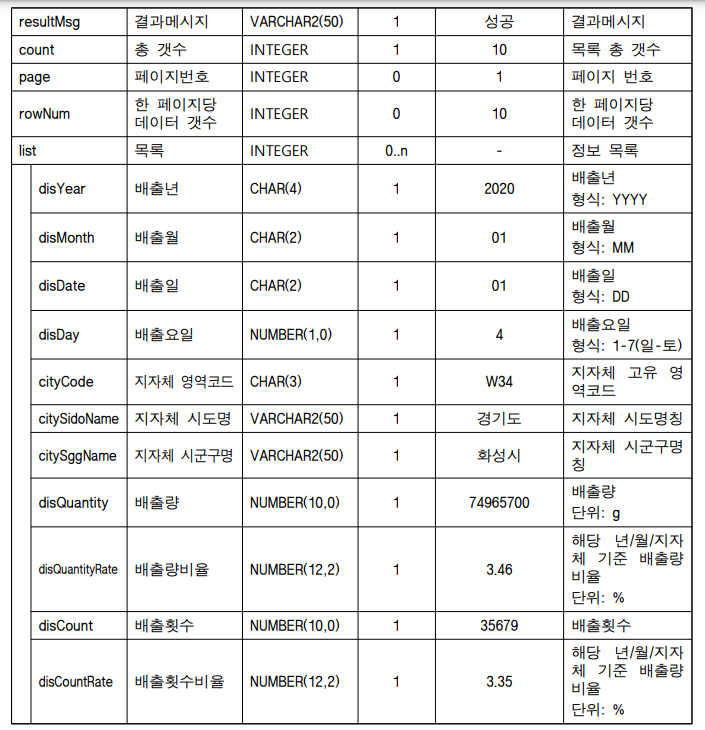